Mall Customers (CLUSTERING)

Importing libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_csv(r'C:\Users\satya\OneDrive\Desktop\ML Projects\dataset\Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualising the Dataset

In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


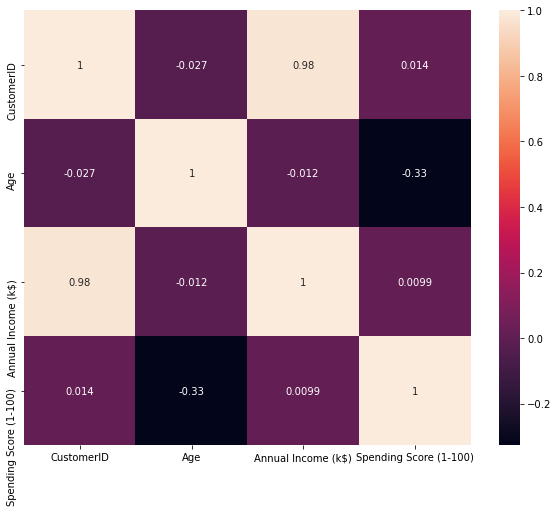

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
len(df.CustomerID.value_counts())

200

customer id has a unique value we not included it into to our model

In [17]:
df.drop('CustomerID',axis=1,inplace=True)

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


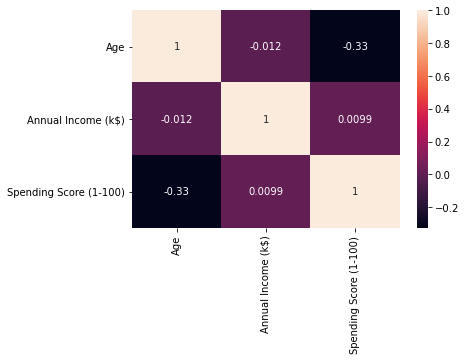

In [19]:
sns.heatmap(df.corr(),annot=True)

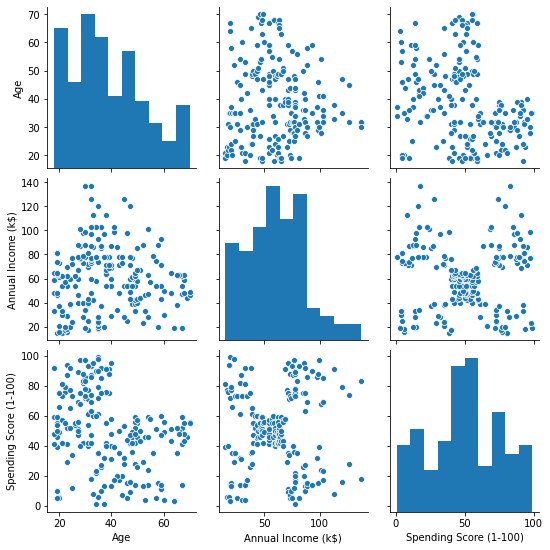

In [20]:
sns.pairplot(df)

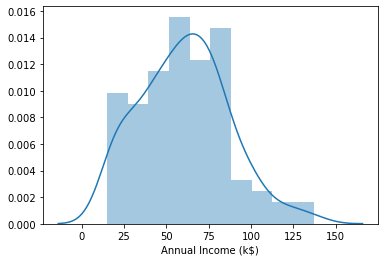

In [21]:
sns.distplot(df['Annual Income (k$)'])

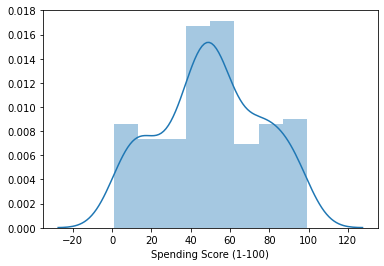

In [22]:
sns.distplot(df['Spending Score (1-100)'])

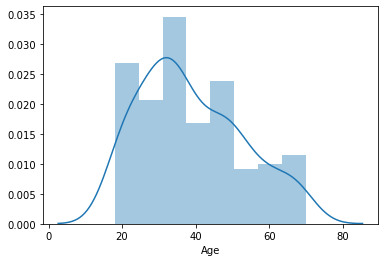

In [23]:
sns.distplot(df['Age'])

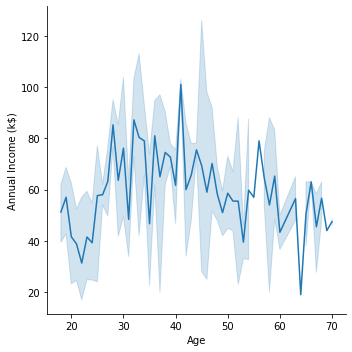

In [26]:
sns.relplot(x='Age',y='Annual Income (k$)',data=df, kind='line')

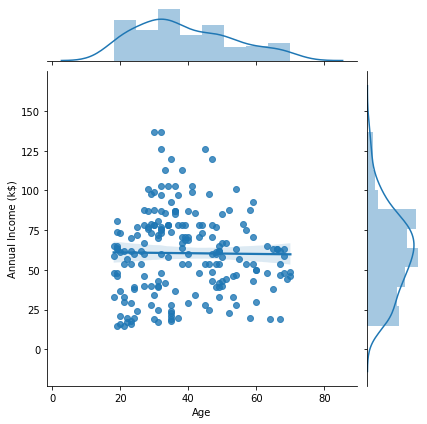

In [29]:
sns.jointplot(x='Age',y='Annual Income (k$)',data=df,kind='reg')

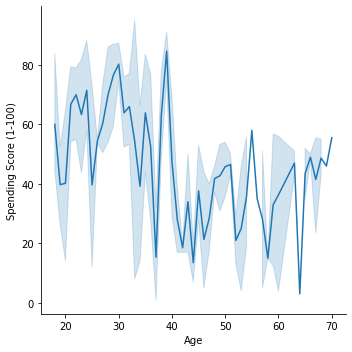

In [30]:
sns.relplot(x='Age',y='Spending Score (1-100)',data=df, kind='line')

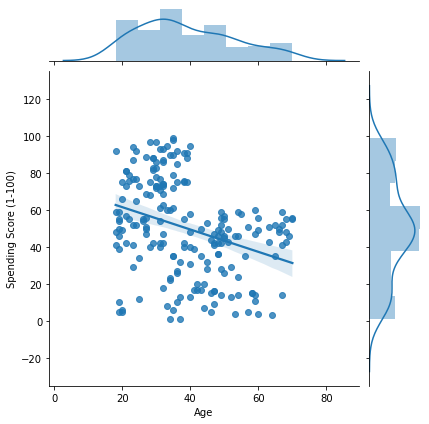

In [33]:
sns.jointplot(x='Age',y='Spending Score (1-100)',data=df, kind='reg')

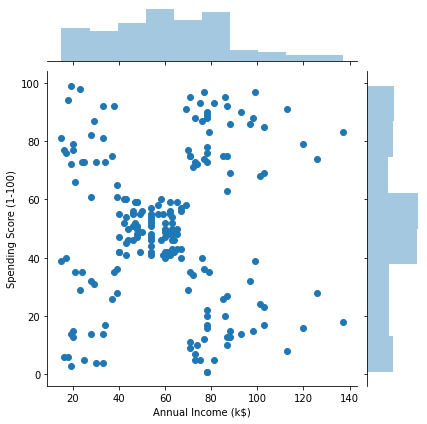

In [34]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

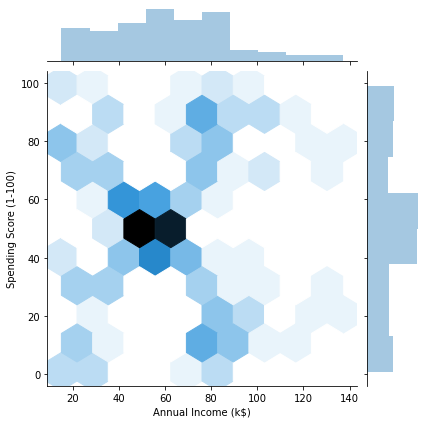

In [35]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,kind='hex')

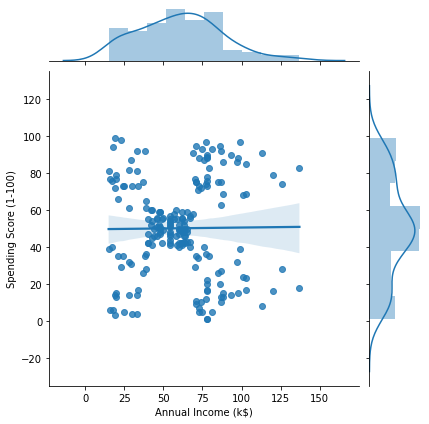

In [36]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,kind='reg')

In [38]:
x=df.iloc[:,[2,3]].values

In [40]:
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [42]:
sc=StandardScaler()
x=sc.fit_transform(x)

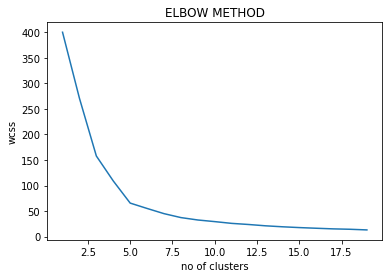

In [48]:
wcss=[]
for i in range(1,20):
    cluster=KMeans(n_clusters=i,init='k-means++',random_state=0)
    cluster.fit(x)
    wcss.append(cluster.inertia_)
plt.plot(range(1,20),wcss)    
plt.title('ELBOW METHOD')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

we take 5 for number of clusters

In [53]:
cluster=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=cluster.fit_predict(x)

In [54]:
print(y_kmeans)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


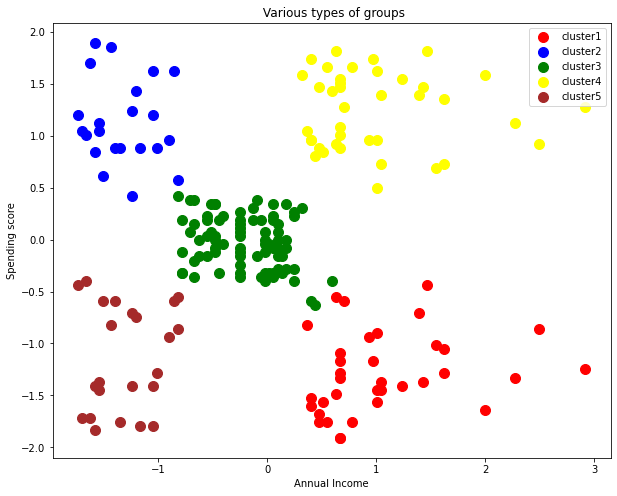

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='brown',label='cluster5')
plt.legend()            
plt.title(' Various types of groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

Hierarchical clustering

Dendrogram representation

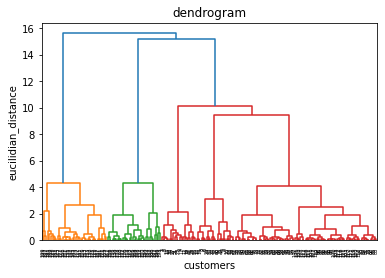

In [57]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('eucilidian_distance')
plt.show()


we get to take 5 clusters

In [63]:
ahc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(x)

In [64]:
y_ahc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

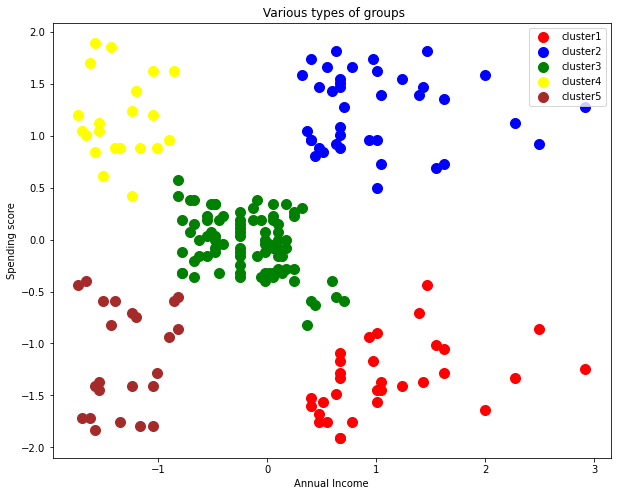

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_ahc==0,0],x[y_ahc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_ahc==1,0],x[y_ahc==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_ahc==2,0],x[y_ahc==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_ahc==3,0],x[y_ahc==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(x[y_ahc==4,0],x[y_ahc==4,1],s=100,c='brown',label='cluster5')
plt.legend()            
plt.title(' Various types of groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()